<a href="https://colab.research.google.com/github/MsAnalyst/BusinessAnalytics-HR-Employee-Attrition-and-Performance/blob/main/BA_Final_Project_(Dewi_I4Zs)_HR_Analytics_for_Pharmaceutical_Companys_Employee_Turnover_and_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import altair as alt
import seaborn as sns
from scipy import stats

#setting default theme
#sns.set_theme(style='white', palette='tab20b')
import seaborn as sns
from matplotlib import pyplot as plt

palette = ["#076535", "#87bd40", "#c9c9c9", "#s7285b", "#f8d548"]
sns.set()

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 35) #display dataframe dengan jumlah kolom ditentukan

## **Data Collection**

In [ ]:
from google.colab import files
data_to_load = files.upload()

## **Data Definition**

Definition all features in the dataset.  

Data HR Attrition is taken from Kaggle and can be accessed from this link: ([Source](https://colab.research.google.com/drive/1sLxEgiOORc1B20V3gZH4sTWp1u7H31T5#scrollTo=g9o6V_1nIiCP&line=3&uniqifier=1))

In [ ]:
attrition = pd.read_csv('HRAttrition.csv')
#attrition.style.background_gradient(axis=0,cmap="Blues")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# show shape of dataset
attrition.shape

(1470, 35)

In [ ]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



## **Exploratory Data Analysis (EDA)**

In [ ]:
# checking for null values and correct them

attrition.isna().sum().sort_values(ascending = False)
attrition.info()

Data looks clean, no empty data (null).
The results show that there are two types of data types, namely object and integer.

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in attrition.columns if attrition[col].dtype == 'object']
num_cols = [col for col in attrition.columns if attrition[col].dtype != 'object']

<Axes: xlabel='Age', ylabel='Count'>

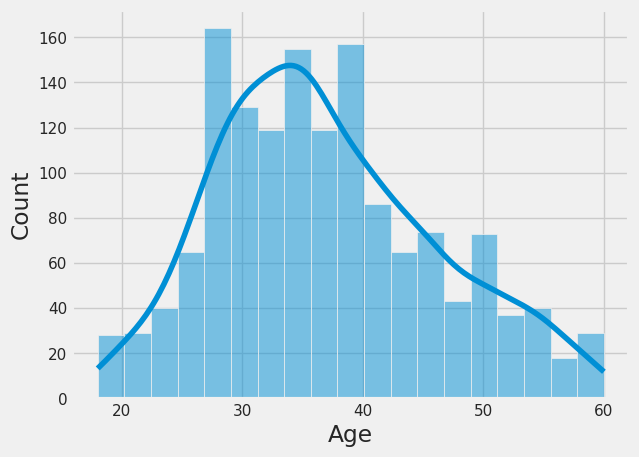

In [ ]:
sns.histplot(attrition.Age, kde=True)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

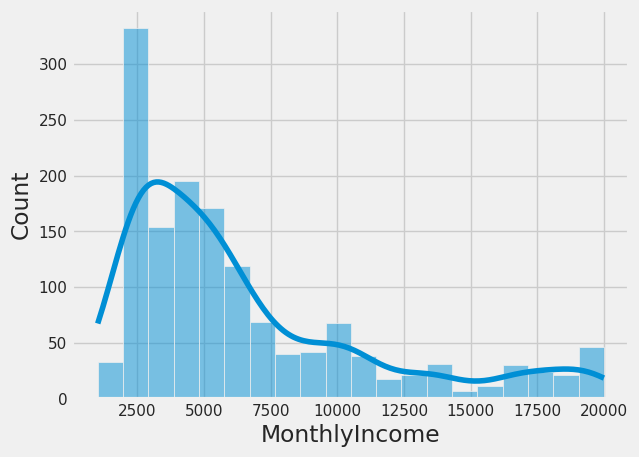

In [ ]:
sns.histplot(attrition.MonthlyIncome, kde=True)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

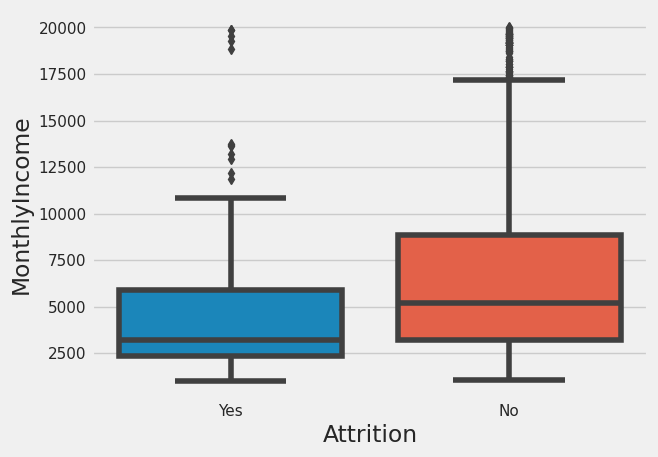

In [ ]:
sns.boxplot(data = attrition, x='Attrition', y='MonthlyIncome')

<Axes: xlabel='Attrition', ylabel='Age'>

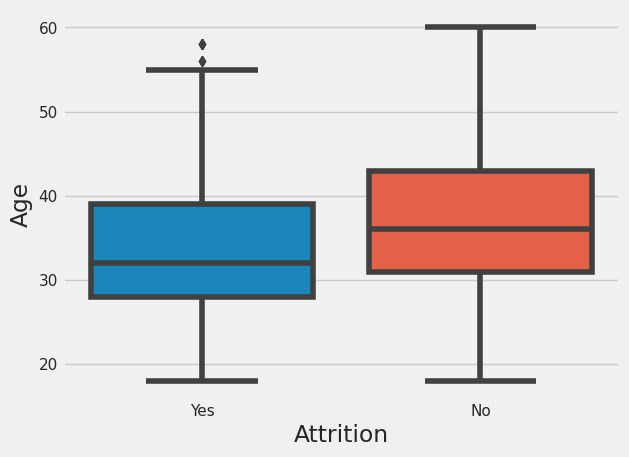

In [ ]:
sns.boxplot(data = attrition, x='Attrition', y='Age')

In [ ]:
# dropping 15 columns:
attrition.drop(['StandardHours', 'NumCompaniesWorked', 'Over18', 'StockOptionLevel', 'TrainingTimesLastYear','MonthlyRate',
                'MaritalStatus', 'EmployeeCount', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
                'EducationField', 'HourlyRate','YearsWithCurrManager'], axis =1, inplace=True)

In [ ]:
attrition['Attrition'] = attrition['Attrition'].map({'Yes': 1, 'No': 0})
attrition['Attrition'] = pd.to_numeric(attrition['Attrition'], errors='coerce')

attrition['OverTime'] = attrition['OverTime'].map({'Yes': 1, 'No': 0})
attrition['OverTimne'] = pd.to_numeric(attrition['OverTime'], errors='coerce')


In [ ]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   Department                1470 non-null   object
 3   EmployeeNumber            1470 non-null   int64 
 4   EnvironmentSatisfaction   1470 non-null   int64 
 5   Gender                    1470 non-null   object
 6   JobInvolvement            1470 non-null   int64 
 7   JobLevel                  1470 non-null   int64 
 8   JobRole                   1470 non-null   object
 9   JobSatisfaction           1470 non-null   int64 
 10  MonthlyIncome             1470 non-null   int64 
 11  OverTime                  1470 non-null   object
 12  PercentSalaryHike         1470 non-null   int64 
 13  PerformanceRating         1470 non-null   int64 
 14  RelationshipSatisfaction

<Axes: >

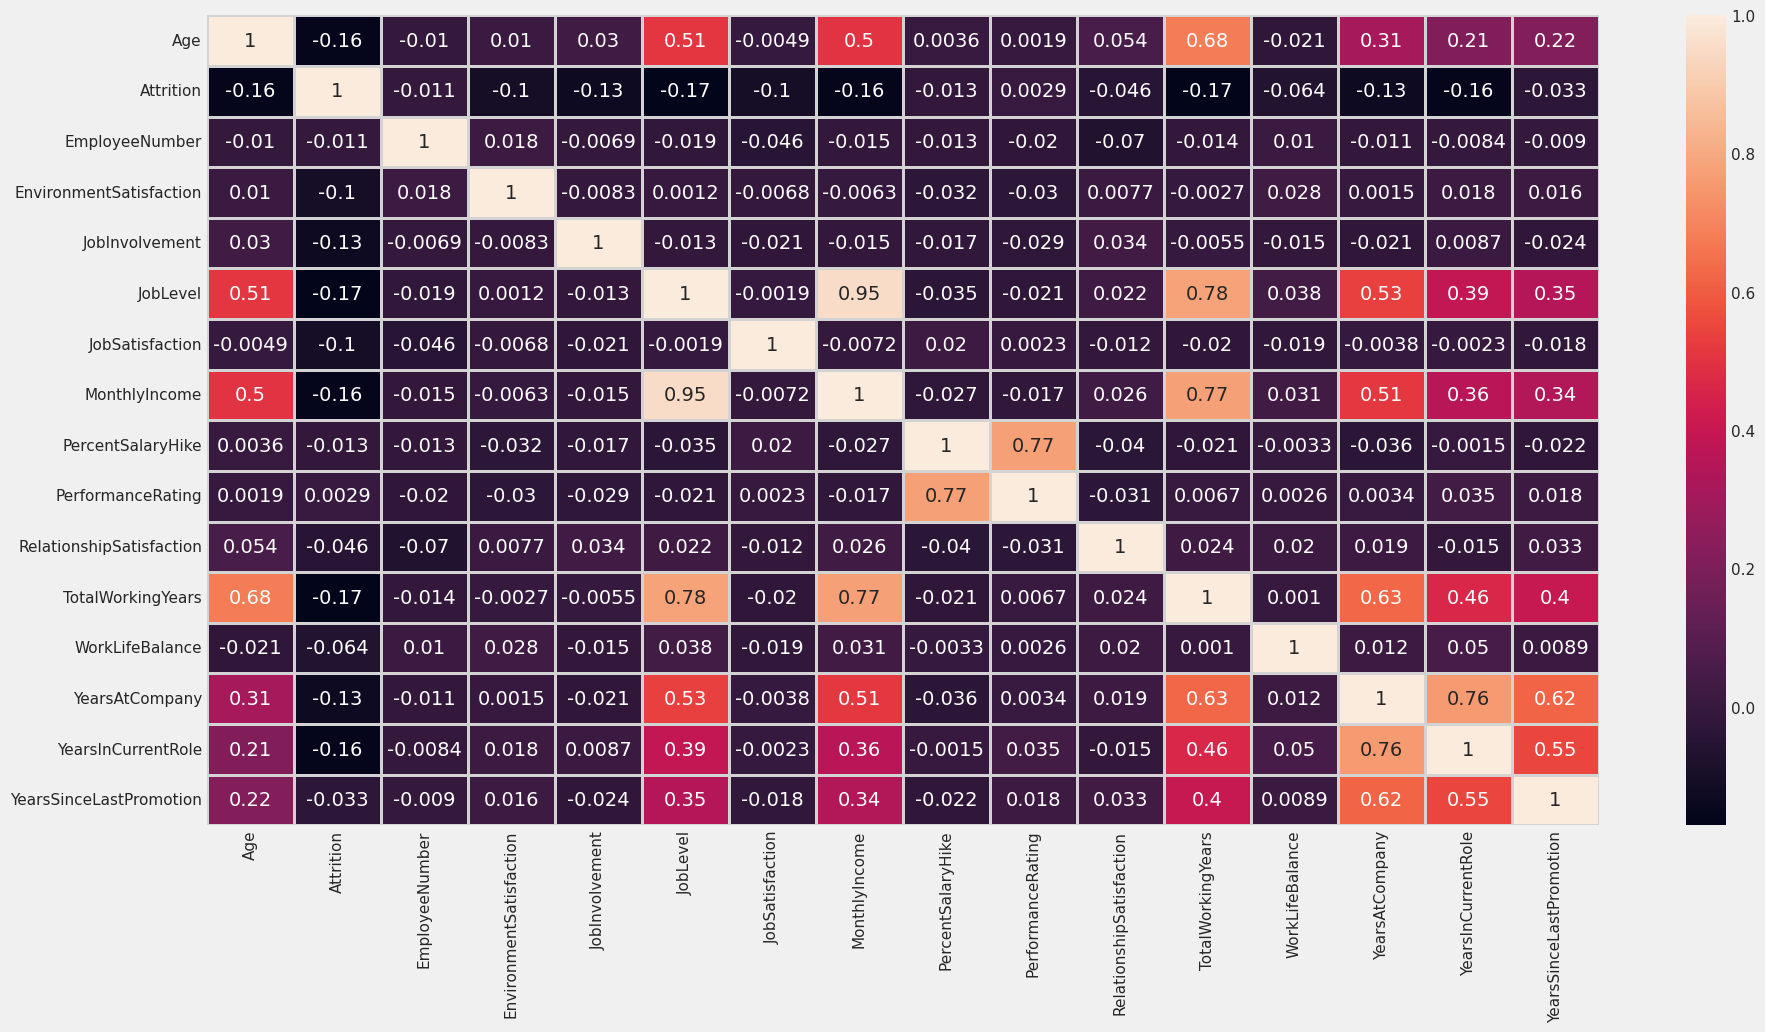

In [ ]:
plt.figure(figsize=(20,10))
cor=attrition.corr()
sns.heatmap(cor, annot = True, linewidths = 1, linecolor = 'lightgrey')

**Referensi**



```
# This is formatted as code
```


* [1] Ferrar, J. and Green, D. (2021) Excellence in People Analytics. 1st edn. Kogan Page. Available at: https://www.perlego.com/book/2706427/excellence-in-people-analytics-how-to-use-workforce-data-to-create-business-value-pdf (Accessed: 15 October 2022).

* [2] West, M. (2019) People Analytics For Dummies. 1st edn. Wiley. Available at: https://www.perlego.com/book/994898/people-analytics-for-dummies-pdf (Accessed: 14 October 2022).

* [3] Diah, A. M, Hasiara, L. O, Ramli, and Irwan, M. (2020)  Employee Retention of Pharmaceutical Firms in Indonesia: Taking Investment in Employee Development and Social and Economic Exchange as Predictors, Systematic Review Pharmacy Vol 11, Issue 1, Jan-Jun, 2020, Politeknik Negeri Samarinda, Available at:  
https://www.sysrevpharm.org/articles/employee-retention-of-pharmaceutical-firms-in-indonesia-taking-investment-in-employee-development-and-social-and-economi.pdf  (Accessed on 4 Apr 2023)

* [4] Netigate.net, How the Employee Satisfaction Index (ESI) works and how to use it, 30 Nov 2022 Available at: https://www.netigate.net/articles/human-resources/how-the-employee-satisfaction-index-esi-works-and-how-to-use-it/ (Accessed on 6 Apr 2023)



